In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=6e02b1f661857ed427cc72ec5a7f7fcfaa6431a9cbd86f044e71b019d4450da5
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-15-01cff2ecc9c2>:55: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'z',offset = 9,cmap = 'viridis',anpha=0.5)
<ipython-input-15-01cff2ecc9c2>:56: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'x',offset =11,cmap = 'viridis',anpha=0.5)
<ipython-input-15-01cff2ecc9c2>:57: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'y',offset =11,cmap = 'viridis',anpha=0.5)


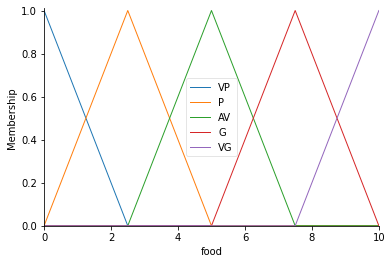

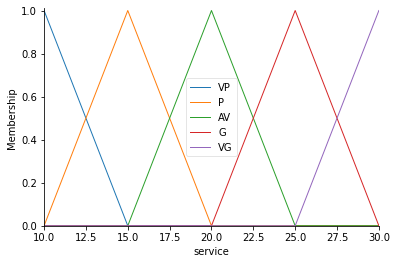

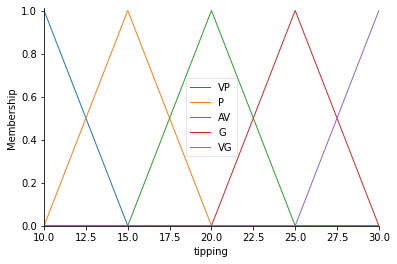

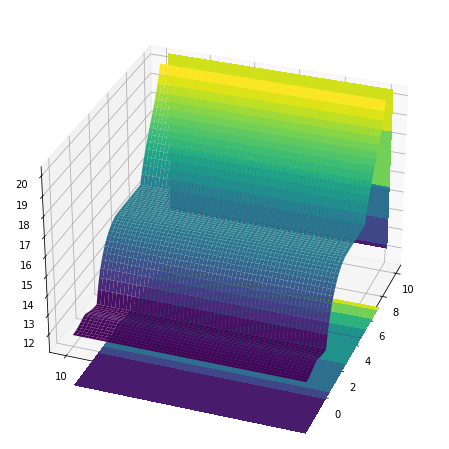

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


import matplotlib.pyplot as plt
from  mpl_toolkits.mplot3d import axes3d

universe = np.linspace(0,10,61)
universe1 = np.linspace(10,30,61)
universe2 = np.linspace(10,30,61)

food = ctrl.Antecedent(universe,'food')
service = ctrl.Antecedent(universe1,'service') 
tipping = ctrl.Consequent(universe2,'tipping')

names = ['VP','P','AV','G','VG']
food.automf(names = names)  
service.automf(names = names)
tipping.automf(names = names)
food.view()
service.view()
tipping.view()


rule0 = ctrl.Rule(antecedent=((food['VP']&service['VP'])|(food['P']&service['VP'])|(food['VP']&service['P'])), consequent= tipping['VP'], label= 'ruleVP')
rule1 = ctrl.Rule(antecedent=((food['P']&service['P'])|(food['AV']&service['VP'])|(food['P']&service['AV'])|
                              (food['AV']&service['VP'])|(food['VP']&service['AV'])|(food['VP']&service['G'])|
                              (food['G']&service['VP'])), consequent= tipping['P'], label= 'ruleP')
rule2 = ctrl.Rule(antecedent=((food['VP']&service['VG'])|(food['P']&service['G'])|(food['AV']&service['AV'])|
                              (food['G']&service['P'])|(food['VG']&service['VP'])), consequent= tipping['AV'], label= 'ruleAV')
rule3 = ctrl.Rule(antecedent=((food['G']&service['G'])|(food['AV']&service['VG'])|(food['VG']&service['AV'])|
                              (food['VG']&service['P'])|(food['P']&service['VG'])|(food['G']&service['AV'])|
                              (food['AV']&service['G'])), consequent= tipping['G'], label= 'ruleG')
rule4 = ctrl.Rule(antecedent=((food['VG']&service['VG'])|(food['G']&service['VG'])|(food['VG']&service['G'])), consequent= tipping['VG'], label= 'ruleVG')

     
system = ctrl.ControlSystem(rules=[rule0,rule2,rule3,rule4,rule1])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z=np.zeros_like(x)


for i in range(61):
    for j in range(61):
        sim.input['food'] = x[i,j]
        sim.input['service'] = y[i,j]
        sim.compute()
        z[i,j] = sim.output['tipping']
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf=ax.plot_surface(x,y,z,rstride =1 ,cstride =1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x,y,z,zdir = 'z',offset = 9,cmap = 'viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir = 'x',offset =11,cmap = 'viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir = 'y',offset =11,cmap = 'viridis',anpha=0.5)
ax.view_init(30,200)

<ipython-input-16-df3d62e37706>:73: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'z',offset = 9,cmap = 'viridis',anpha=0.5)
<ipython-input-16-df3d62e37706>:74: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'x',offset =11,cmap = 'viridis',anpha=0.5)
<ipython-input-16-df3d62e37706>:75: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir = 'y',offset =11,cmap = 'viridis',anpha=0.5)


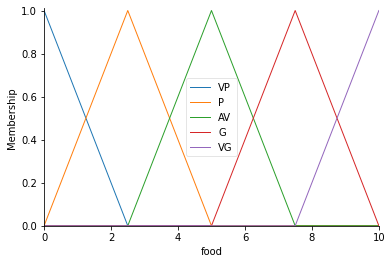

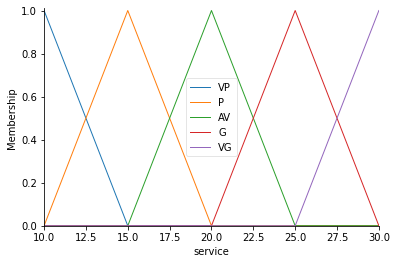

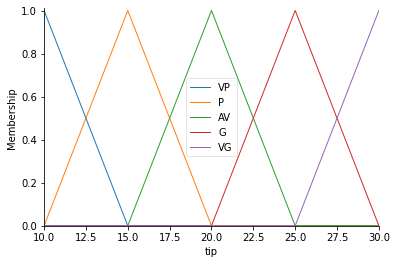

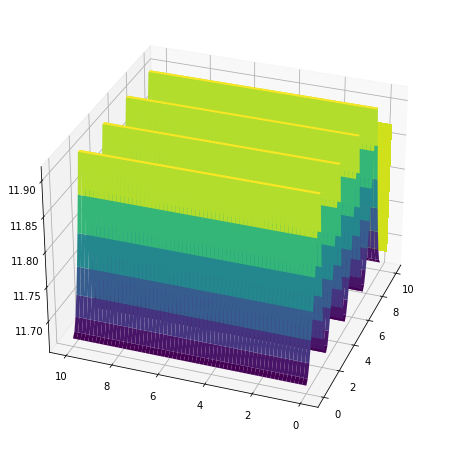

In [16]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


import matplotlib.pyplot as plt
from  mpl_toolkits.mplot3d import axes3d

universe = np.linspace(0,10,61)
universe1 = np.linspace(10,30,61)
universe2 = np.linspace(10,30,61)

food = ctrl.Antecedent(universe,'food')
service = ctrl.Antecedent(universe1,'service') 
tip = ctrl.Consequent(universe2,'tip')

names = ['VP','P','AV','G','VG']
food.automf(names = names)  
service.automf(names = names)
tip.automf(names = names)
food.view()
service.view()
tip.view()


rule0= ctrl.Rule(antecedent=((food['VP']&service['VP'])   |
                             (food['P']&service['VP']) |
                             (food['VP']&service['P'])),consequent=tip['VP'],label='rule VP')


rule2= ctrl.Rule(antecedent=(
    (food['VP']&service['AV'])  |  (food['VP']&service['G']) | 
    (food['P']&service['P'])| (food['P']&service['AV']) | 
    (food['AV']&service['VP']) | (food['AV']&service['P']) |
    (food['G']&service['VP']) )   ,consequent=tip['VP'],label='rule P')

rule3= ctrl.Rule(antecedent=(
    (food['VP']&service['VG'])  |  
    (food['G']&service['P']) |
    (food['VG']&service['P'])|
    (food['AV']&service['AV'])| 
    (food['P']&service['AV']) | 
    (food['G']&service['P']) | (food['VG']&service['VP'])),consequent=tip['VP'],label='rule AV')
rule4= ctrl.Rule(antecedent=(
    (food['G']&service['AV'])  |  (food['VG']&service['AV']) | 
    (food['G']&service['AV'])| (food['G']&service['G']) | 
    (food['VG']&service['AV'])),consequent=tip['VP'],label='rule G')

rule5= ctrl.Rule(antecedent=(
    (food['G']&service['VG'])  |  (food['VG']&service['G']) | 
    (food['VG']&service['VG'])),consequent=tip['VP'],label='rule VG')


system = ctrl.ControlSystem(rules=[rule0,rule2,rule3,rule4,rule5])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z=np.zeros_like(x)


for i in range(61):
    for j in range(61):
        sim.input['food'] = x[i,j]
        sim.input['service'] = y[i,j]
        sim.compute()
        z[i,j] = sim.output['tip']

 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
suf=ax.plot_surface(x,y,z,rstride =1 ,cstride =1, cmap = 'viridis', linewidth = 0.4, antialiased = True)

cset = ax.contourf(x,y,z,zdir = 'z',offset = 9,cmap = 'viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir = 'x',offset =11,cmap = 'viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir = 'y',offset =11,cmap = 'viridis',anpha=0.5)
ax.view_init(30,200)